In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pickle
import os

In [4]:
# if os.path.exists('user_tweets.pkl'):
#     with open('user_tweets.pkl', 'rb') as f:
#         user_tweets = pickle.load(f)

In [5]:
bigdf = pd.read_csv("bigasstweetsdataset.csv", encoding="latin-1")
bigdf.columns = ["target", "ids", "date", "flag", "user", "TweetText"]
bigdf.drop(['ids', 'flag'], axis=1, inplace=True)

In [6]:
# import pandas as pd
# import random

# # Sample DataFrame 'bigdf'
# bigdf = pd.DataFrame({
#     "TweetText": [
#         "I love going for long walks in the park.",
#         "Today's weather is perfect!",
#         "Had a great time with friends at the party.",
#         "Feeling down and tired.",
#         "Wishing the weekend would never end.",
#         "Excited about the new movie release.",
#         "Feeling stressed with work deadlines.",
#         "Enjoying a delicious meal with family.",
#         "Feeling grateful for all the support.",
#         "Feeling bored and restless at home."
#     ],
#     "target": [1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
# })

# # Print the DataFrame
# print(bigdf)


In [7]:
bigdf.drop(['date', 'user'], axis=1, inplace=True)

In [8]:
bigdf.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
pos_data = bigdf[bigdf.target==0]
neg_data = bigdf[bigdf.target==4]

In [10]:
print(pos_data.shape)
print(neg_data.shape)

(799999, 2)
(800000, 2)


In [11]:
del pos_data
del neg_data

In [12]:
from sklearn.utils import shuffle

bigdf = shuffle(bigdf)
bigdf = bigdf.head(10000)
# Set 'target' values to 1 where it is currently 4
bigdf.loc[bigdf['target'] == 4, 'target'] = 1

In [13]:
bigdf['CleanTweetText'] = bigdf['TweetText'].str.replace("@", "") 
bigdf['CleanTweetText'] = bigdf['CleanTweetText'].str.replace(r"http\S+", "")
bigdf['CleanTweetText'] = bigdf['CleanTweetText'].str.replace("[^a-zA-Z]", " ")

C:\Users\advai\AppData\Local\Temp\ipykernel_26628\830869094.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  bigdf['CleanTweetText'] = bigdf['CleanTweetText'].str.replace(r"http\S+", "")
C:\Users\advai\AppData\Local\Temp\ipykernel_26628\830869094.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  bigdf['CleanTweetText'] = bigdf['CleanTweetText'].str.replace("[^a-zA-Z]", " ")


In [14]:
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

bigdf['CleanTweetText'] = bigdf['CleanTweetText'].apply(lambda text : remove_stopwords(text.lower()))
bigdf['CleanTweetText'] = bigdf['CleanTweetText'].apply(lambda x: x.split())
del stopwords

In [15]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 

bigdf['CleanTweetText'] = bigdf['CleanTweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
del stemmer

In [16]:
bigdf['CleanTweetText'] = bigdf['CleanTweetText'].apply(lambda x: ' '.join([w for w in x]))

In [17]:
bigdf['CleanTweetText'] = bigdf['CleanTweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
bigdf.head()

,target,TweetText,CleanTweetText
276065,0,UGGHHHH!!!!!! We leaving the Royal Palm. I'm s...,ugghhhh leav royal palm
526483,0,waking up at 6 after waking up at 10 the past ...,wake wake past week total mess feel like like
1118818,1,I was so nervous for hollie. Relieved it was t...,nervou holli reliev tearless
1204998,1,@itschristablack Nice,itschristablack nice
226418,0,damn it cavs...,damn


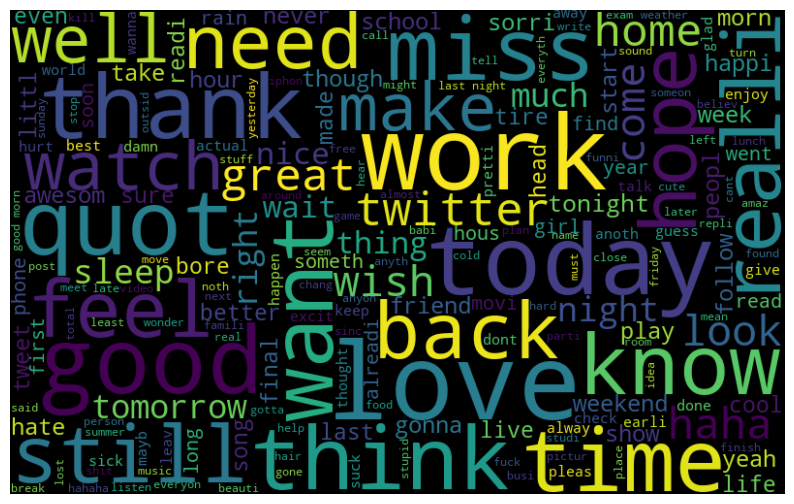

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in bigdf['CleanTweetText']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

del wordcloud
del all_words

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with 'TweetText' and 'target' fields

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# Why tf was I using count vectorizer ???
# insomina gets ou
# DO NOT DO THE BELOW
# WORDS ARE VECTORS, NOT COUTS
# It is NOT TF-IDF or CountVectorizer-able data, we are not doing freq analysis or product recommnedations
# Use Word2vec or something similar. OpenAI text2vec-openai?

In [20]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Initialize CountVectorizer
# vectorizer = CountVectorizer()

# bigtext = bigdf['CleanTweetText']

# big_vectors = vectorizer.fit_transform(bigtext)

# # if os.path.exists('tweets_vectors.pkl'):
# #     with open('tweets_vectors.pkl', 'rb') as f:
# #         big_vectors = pickle.load(f)
# # else:
# #     # Fit-transform the texts to convert them into numerical vectors
# #     big_vectors = vectorizer.fit_transform(bigtext)
# #     with open('tweets_vectors.pkl', 'wb') as f:
# #         pickle.dump(big_vectors, f)

# big_texts = big_vectors.toarray()

In [21]:
del bigtext
del big_vectors

In [22]:
# Combine the text array with the 'target' column
combined_data = np.column_stack((big_texts, bigdf['target']))

In [23]:
del big_texts
del bigdf

In [24]:
# Split the dataset into train and test sets
# train_df, test_df = train_test_split(combined_data, test_size=0.3, random_state=42)
# del train_df
# del test_df

In [25]:
# Perform train-test split with 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    combined_data[:, :-1], combined_data[:, -1], test_size=0.3, random_state=42)

In [26]:
del combined_data

In [27]:
# Reshape the X_train and X_test arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [28]:
# datacols = combined_data.columns

# train_texts = train_df.loc[:, datacols!='target']
# train_labels = train_df.loc[:, 'target']
# test_texts = test_df.loc[:, datacols!='target']
# test_labels = test_df.loc[:, 'target']
# del datacols

In [29]:
# # Reshape the X_train and X_test arrays
# train_texts = train_texts.reshape(train_texts.shape[0], -1)
# test_texts = test_texts.reshape(test_texts.shape[0], -1)

In [30]:
# train_texts.shape

In [31]:
# Define batch size and number of epochs
batch_size = 32
num_epochs = 5

In [32]:
# import numpy as np
# train_texts = np.ravel(train_texts)
# train_labels = np.ravel(train_labels)


In [33]:
# Define the classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        averaged = embedded.mean(dim=1)
        output = self.fc(averaged)
        output = self.sigmoid(output)
        return output

In [34]:
# del stemmer
# del stopwords
# del targets
# del outputs
# del test_texts
# del vectorizer
# del wordcloud

In [35]:
# Initialize model
input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = 1
model = SentimentClassifier(input_dim, hidden_dim, output_dim)

In [36]:
# Create data loaders for train and test sets
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

del X_train
del X_test
del y_train
del y_test


In [37]:
from torch.optim import Adam

# Move model to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up optimizer and loss function
optimizer = Adam(model.parameters())
criterion = nn.BCELoss()

In [41]:

# Training loop (up to 5 epochs)
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # print(labels)
        # print(labels.shape)
        # print(inputs)
        # print(inputs.shape)

        optimizer.zero_grad()

        outputs = model(inputs)
        # print(outputs)
        # print(outputs.shape)
        # print(labels.unsqueeze(1))
        loss = criterion(outputs, labels.unsqueeze(1).float())
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}")
    
     # Evaluation on test data
    model.eval()
    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item() * inputs.size(0)

            predicted_labels = (outputs >= 0.5).squeeze().long()
            correct += (predicted_labels == labels.long()).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)
    print(f"Epoch: {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch: 1/50, Train Loss: 0.6953
Epoch: 1/50, Test Loss: 0.6934, Accuracy: 0.5050
Epoch: 2/50, Train Loss: 0.6937
Epoch: 2/50, Test Loss: 0.6995, Accuracy: 0.5050
Epoch: 3/50, Train Loss: 0.6956
Epoch: 3/50, Test Loss: 0.6932, Accuracy: 0.4950
Epoch: 4/50, Train Loss: 0.6941
Epoch: 4/50, Test Loss: 0.6934, Accuracy: 0.4950
Epoch: 5/50, Train Loss: 0.6943
Epoch: 5/50, Test Loss: 0.6969, Accuracy: 0.5050
Epoch: 6/50, Train Loss: 0.6943
Epoch: 6/50, Test Loss: 0.6948, Accuracy: 0.5050
Epoch: 7/50, Train Loss: 0.6953
Epoch: 7/50, Test Loss: 0.6935, Accuracy: 0.4950
Epoch: 8/50, Train Loss: 0.6939
Epoch: 8/50, Test Loss: 0.6981, Accuracy: 0.5050
Epoch: 9/50, Train Loss: 0.6945
Epoch: 9/50, Test Loss: 0.6932, Accuracy: 0.4950
Epoch: 10/50, Train Loss: 0.6942
Epoch: 10/50, Test Loss: 0.6950, Accuracy: 0.4950
Epoch: 11/50, Train Loss: 0.6942
Epoch: 11/50, Test Loss: 0.6959, Accuracy: 0.4950
Epoch: 12/50, Train Loss: 0.6946
Epoch: 12/50, Test Loss: 0.7033, Accuracy: 0.5050
Epoch: 13/50, Train Lo